In [1]:
import sys
import os
from pathlib import Path
import pickle
import json
import sqlite3

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


from cbir import BASE_DIR
os.chdir(BASE_DIR)

In [2]:
# !ls -lah .cbir/databases/d-2/i-1/

In [3]:
# conn = sqlite3.connect('.cbir/databases/d-2/i-1/index.db')
# c = conn.cursor()
# cursor = c.execute("SELECT name FROM sqlite_master WHERE type='table';")
# print(cursor.fetchall())
# conn.close()

______

In [6]:
database = 'd-sample'
index = 'i-6'

In [7]:
with open(f'.cbir/databases/{database}/{index}/params.pkl', 'rb') as f:
    params = pickle.load(f)
K = params['K']
L = params['L']
N = K ** L
print(params)

{'des_type': 'HardNetAll', 'max_keypoints': 2000, 'K': 10, 'L': 5, 'n_words': 100000}


In [8]:
with open(f'.cbir/databases/{database}/{index}/data_dependent_params.pkl', 'rb') as f:
    data_dependent_params = pickle.load(f)
print(data_dependent_params.keys())
print('count_images:', data_dependent_params['count_images'])

dict_keys(['count_images', 'freqs', 'idf', 'most_frequent', 'least_frequent'])
count_images: 2


In [9]:
word_to_count_photos = [0] * N

In [10]:
conn = sqlite3.connect(f'.cbir/databases/{database}/{index}/index.db')
c = conn.cursor()
cursor = c.execute('select word, photos from word')
for row in cursor:
    word_to_count_photos[row[0]] = len(pickle.loads(row[1]))
conn.close()

In [11]:
print(len(list(filter(lambda x: x != 0, word_to_count_photos))))

710


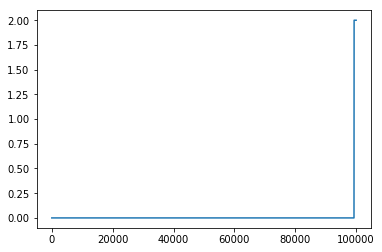

In [12]:
plt.plot(sorted(word_to_count_photos));

_____

In [14]:
conn = sqlite3.connect(f'.cbir/databases/{database}/{index}/index.db')
c = conn.cursor()
cursor = c.execute('select * from photobow limit 5')
for row in cursor:
    photo_bow_raw = row
    bow_sparse = pickle.loads(photo_bow_raw[1])
    bow = bow_sparse.toarray().squeeze()
    print(bow.shape)
    print(bow)
conn.close()

(10001,)
[   2    0    0 ...    0    0 2000]
(10001,)
[   2    0    0 ...    0    0 2000]
